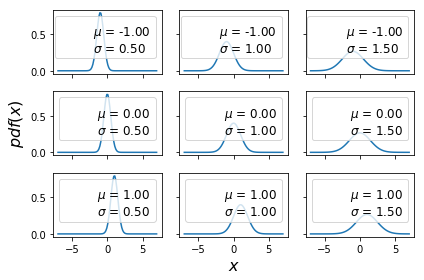

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i, j].legend(fontsize=12)
ax[2, 1].set_xlabel('$x$', fontsize=16)
ax[1, 0].set_ylabel('$pdf(x)$', fontsize=16)
plt.tight_layout()

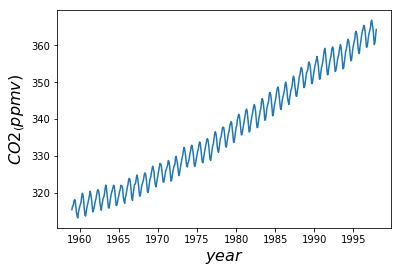

In [6]:
data = np.genfromtxt('D:\\programs\\自己玩的东西\\Python贝叶斯分析\\教材内容\\mauna_loa_CO2.csv', delimiter=',')
plt.plot(data[:, 0], data[:, 1])
plt.xlabel('$year$', fontsize=16)
plt.ylabel('$CO2_ (ppmv)$', fontsize=16)

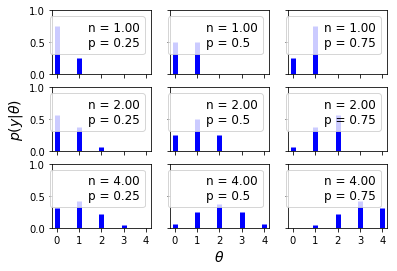

In [7]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params)+1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i, j].vlines(x, 0, y, colors='b', lw=5)
        ax[i, j].set_ylim(0, 1)
        ax[i, j].plot(0, 0, label="n = {:3.2f}\np = {:3.2}".format(n, p), alpha=0)
        ax[i, j].legend(fontsize=12)
ax[2, 1].set_xlabel('$\\theta$', fontsize=14)
ax[1, 0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0, 0].set_xticks(x)

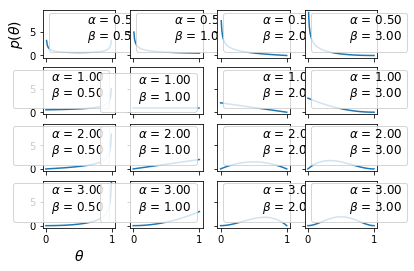

In [8]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i, j].legend(fontsize=12)
ax[3, 0].set_xlabel('$\\theta$', fontsize=14)
ax[0, 0].set_ylabel('$p(\\theta)$', fontsize=14)
plt.savefig('D:\\programs\\自己玩的东西\\Python贝叶斯分析\\教材内容\\B04958_01_04.png', dpi=300, figsize=(5.5, 5.5))

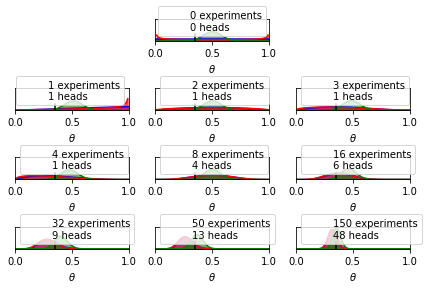

In [12]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior+y, b_prior+N-y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.xlabel(r"$\theta$")
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('D:\\programs\\自己玩的东西\\Python贝叶斯分析\\教材内容\\B04958_01_05.png', dpi=300, figsize=(5.5, 5.5))

(0, 1)

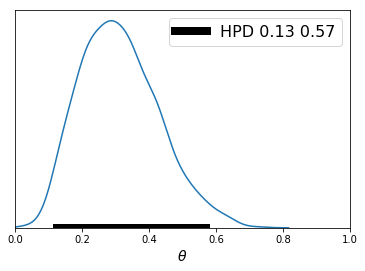

In [15]:
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(*HPD), linewidth=8, color='k')
    plt.legend(fontsize=16)
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])
    
    
np.random.seed(1)
post = stats.beta.rvs(5, 11, size=1000)
naive_hpd(post)
plt.xlim(0, 1)

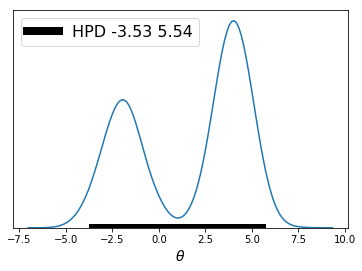

In [16]:
np.random.seed(1)
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hpd(mix_norm)
plt.savefig('D:\\programs\\自己玩的东西\\Python贝叶斯分析\\教材内容\\B04958_01_08.png', dpi=300, figsize=(5.5, 5.5))

In [19]:
from __future__ import division
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats.kde as kde


def hpd_grid(sample, alpha=0.05, roundto=2):
    """Calculate highest posterior density (HPD) of array for given alpha. 
    The HPD is the minimum width Bayesian credible interval (BCI). 
    The function works for multimodal distributions, returning more than one mode

    Parameters
    ----------
    
    sample : Numpy array or python list
        An array containing MCMC samples
    alpha : float
        Desired probability of type I error (defaults to 0.05)
    roundto: integer
        Number of digits after the decimal point for the results

    Returns
    ----------
    hpd: array with the lower 
          
    """
    sample = np.asarray(sample)
    sample = sample[~np.isnan(sample)]
    # get upper and lower bounds
    l = np.min(sample)
    u = np.max(sample)
    density = kde.gaussian_kde(sample)
    x = np.linspace(l, u, 2000)
    y = density.evaluate(x)
    #y = density.evaluate(x, l, u) waitting for PR to be accepted
    xy_zipped = zip(x, y/np.sum(y))
    xy = sorted(xy_zipped, key=lambda x: x[1], reverse=True)
    xy_cum_sum = 0
    hdv = []
    for val in xy:
        xy_cum_sum += val[1]
        hdv.append(val[0])
        if xy_cum_sum >= (1-alpha):
            break
    hdv.sort()
    diff = (u-l)/20  # differences of 5%
    hpd = []
    hpd.append(round(min(hdv), roundto))
    for i in range(1, len(hdv)):
        if hdv[i]-hdv[i-1] >= diff:
            hpd.append(round(hdv[i-1], roundto))
            hpd.append(round(hdv[i], roundto))
    hpd.append(round(max(hdv), roundto))
    ite = iter(hpd)
    hpd = list(zip(ite, ite))
    modes = []
    for value in hpd:
         x_hpd = x[(x > value[0]) & (x < value[1])]
         y_hpd = y[(x > value[0]) & (x < value[1])]
         modes.append(round(x_hpd[np.argmax(y_hpd)], roundto))
    return hpd, x, y, modes



def plot_post(sample, alpha=0.05, show_mode=True, kde_plot=True, bins=50, 
    ROPE=None, comp_val=None, roundto=2):
    """Plot posterior and HPD

    Parameters
    ----------

    sample : Numpy array or python list
        An array containing MCMC samples
    alpha : float
        Desired probability of type I error (defaults to 0.05)
    show_mode: Bool
        If True the legend will show the mode(s) value(s), if false the mean(s)
        will be displayed
    kde_plot: Bool
        If True the posterior will be displayed using a Kernel Density Estimation
        otherwise an histogram will be used
    bins: integer
        Number of bins used for the histogram, only works when kde_plot is False
    ROPE: list or numpy array
        Lower and upper values of the Region Of Practical Equivalence
    comp_val: float
        Comparison value
        

    Returns
    -------

    post_summary : dictionary
        Containing values with several summary statistics

    """       

    post_summary = {'mean':0,'median':0,'mode':0, 'alpha':0,'hpd_low':0,
                   'hpd_high':0, 'comp_val':0, 'pc_gt_comp_val':0, 'ROPE_low':0,
                   'ROPE_high':0, 'pc_in_ROPE':0}

    post_summary['mean'] = round(np.mean(sample), roundto)
    post_summary['median'] = round(np.median(sample), roundto)
    post_summary['alpha'] = alpha

    # Compute the hpd, KDE and mode for the posterior
    hpd, x, y, modes = hpd_grid(sample, alpha, roundto)
    post_summary['hpd'] = hpd
    post_summary['mode'] = modes

    ## Plot KDE.
    if kde_plot:
            plt.plot(x, y, color='k', lw=2)
    ## Plot histogram.
    else:
        plt.hist(sample, normed=True, bins=bins, facecolor='b', 
        edgecolor='w')

    ## Display mode or mean:
    if show_mode:
        string = '{:g} ' * len(post_summary['mode'])
        plt.plot(0, label='mode =' + string.format(*post_summary['mode']), alpha=0)
    else:
        plt.plot(0, label='mean = {:g}'.format(post_summary['mean']), alpha=0)

    ## Display the hpd.
    hpd_label = ''
    for value in hpd:
        plt.plot(value, [0, 0], linewidth=10, color='b')
        hpd_label = hpd_label +  '{:g} {:g}\n'.format(round(value[0], roundto), round(value[1], roundto)) 
    plt.plot(0, 0, linewidth=4, color='b', label='hpd {:g}%\n{}'.format((1-alpha)*100, hpd_label))
    ## Display the ROPE.
    if ROPE is not None:
        pc_in_ROPE = round(np.sum((sample > ROPE[0]) & (sample < ROPE[1]))/len(sample)*100, roundto)
        plt.plot(ROPE, [0, 0], linewidth=20, color='r', alpha=0.75)
        plt.plot(0, 0, linewidth=4, color='r', label='{:g}% in ROPE'.format(pc_in_ROPE))
        post_summary['ROPE_low'] = ROPE[0] 
        post_summary['ROPE_high'] = ROPE[1] 
        post_summary['pc_in_ROPE'] = pc_in_ROPE
    ## Display the comparison value.
    if comp_val is not None:
        pc_gt_comp_val = round(100 * np.sum(sample > comp_val)/len(sample), roundto)
        pc_lt_comp_val = round(100 - pc_gt_comp_val, roundto)
        plt.axvline(comp_val, ymax=.75, color='g', linewidth=4, alpha=0.75,
            label='{:g}% < {:g} < {:g}%'.format(pc_lt_comp_val, 
                                                comp_val, pc_gt_comp_val))
        post_summary['comp_val'] = comp_val
        post_summary['pc_gt_comp_val'] = pc_gt_comp_val

    plt.legend(loc=0, framealpha=1)
    frame = plt.gca()
    frame.axes.get_yaxis().set_ticks([])
    return post_summary
    



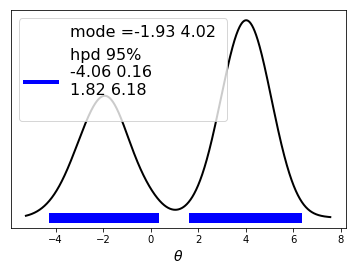

In [20]:
plot_post(mix_norm, roundto=2, alpha=0.05)
plt.legend(loc=0, fontsize=16)
plt.xlabel(r"$\theta$", fontsize=14)